In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Mon Oct 24 14:29:31 2022

@author: samy
"""

import shap
from shap.plots import waterfall, beeswarm

import time
import copy
import pickle
import joblib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import model_train as mt
from sklearn.tree import DecisionTreeClassifier 

import pickle
import pickle5
import matplotlib.pyplot as plt


from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from transformers import BertTokenizer, BertModel
from transformers import (AdamW, 
                          get_linear_schedule_with_warmup,
                          set_seed)

import shap
from shap.plots import text
from sklearn.metrics import classification_report
import copy

In [2]:
"""
load pickle data file
"""
def load_pickle(path_file):
    with open(path_file, 'rb') as file:
        data = pickle.load(file)
    return data

def load_pickle5(path_file):
    with open(path_file, 'rb') as file:
        data = pickle5.load(file)
    return data

# ============================== TEST SET ==============================

## ------------------ CONTROVERSY (pelosi) ---------------

In [25]:
p = '/data/DEV_DATA/TWITTER API/other/data_complete_vaccine_chloro/data/data_objects/ANALYSIS/influencer_LABEL/5%/bert_text (overfit)/shap_temp_TEST_pelosi.pickle'
shap_valuesC, samp_X, samp_y, outputs, val, samp_X_list = load_pickle(p)
THE_LABEL = 1

In [27]:
outputs = np.stack(outputs)
preds = outputs.argmax(axis=-1)
lab = [THE_LABEL] * len(preds)
print(classification_report(lab, preds))

bad_preds = []
good_preds = []
cpt=0
for p, l in zip(preds, lab):
    if(p!=l):
        bad_preds.append(cpt)
    else:
        good_preds.append(cpt)
    cpt+=1
print(len(bad_preds), 'vs', len(good_preds))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.99      0.99      1676

    accuracy                           0.99      1676
   macro avg       0.50      0.49      0.50      1676
weighted avg       1.00      0.99      0.99      1676

17 vs 1659


In [12]:
# shap_values_TEMP_GOOD = copy.deepcopy(shap_valuesC)

# old_v = shap_values_TEMP_GOOD.values
# old_b = shap_values_TEMP_GOOD.base_values
# old_d = shap_values_TEMP_GOOD.data

# new_v = np.delete(old_v, bad_preds)
# new_b = np.delete(old_b, bad_preds)
# new_d = np.delete(old_d, bad_preds)
# new_d = tuple(new_d)

# shap_values_TEMP_GOOD.values = new_v
# shap_values_TEMP_GOOD.base_values = new_b
# shap_values_TEMP_GOOD.data = new_d
# #-----------------------------------------------------
# shap_values_TEMP_BAD = copy.deepcopy(shap_valuesC)

# old_v = shap_values_TEMP_BAD.values
# old_b = shap_values_TEMP_BAD.base_values
# old_d = shap_values_TEMP_BAD.data

# new_v = np.delete(old_v, good_preds)
# new_b = np.delete(old_b, good_preds)
# new_d = np.delete(old_d, good_preds)
# new_d = tuple(new_d)

# shap_values_TEMP_BAD.values = new_v
# shap_values_TEMP_BAD.base_values = new_b
# shap_values_TEMP_BAD.data = new_d

# print('len(good) = ', len(good_preds))
# print('len(bad) = ', len(bad_preds))


# print('   ---- (BERT) (TEST) (good_preds) mean ----')
# shap.plots.bar(shap_values_TEMP_GOOD.mean(0))
# print('   ---- (BERT) (TEST) (good_preds) min [GOOD] ----')
# shap.plots.bar(shap_values_TEMP_GOOD.min(0))
# print('   ---- (BERT) (TEST) (good_preds) max [GOOD] ----')
# shap.plots.bar(shap_values_TEMP_GOOD.max(0), order=shap.Explanation.identity)

   ---- (BERT) (TEST) (all) mean ----


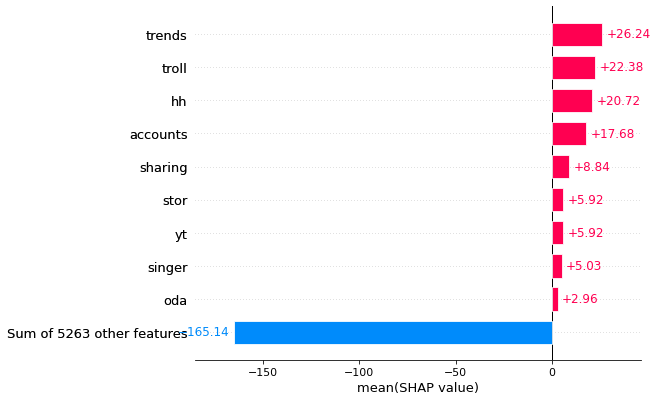

   ---- (BERT) (TEST) (all) min [GOOD] ----


   ---- (BERT) (TEST) (all) max [GOOD] ----


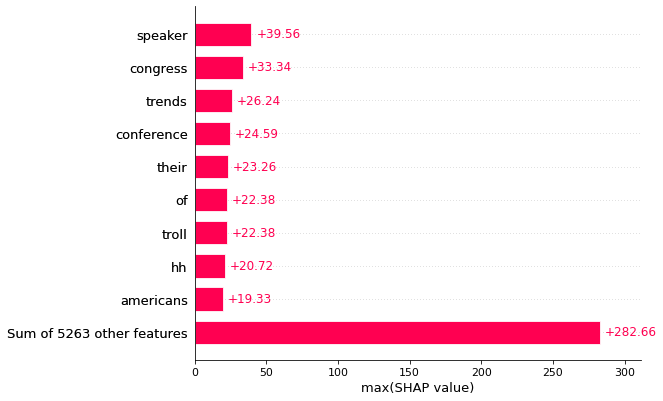

In [11]:
print('   ---- (BERT) (TEST) (all) mean ----')
shap.plots.bar(shap_valuesC.mean(0), order=shap.Explanation.identity)
print('   ---- (BERT) (TEST) (all) min ----')
shap.plots.bar(shap_valuesC.min(0))
print('   ---- (BERT) (TEST) (all) max ----')
shap.plots.bar(shap_valuesC.max(0), order=shap.Explanation.identity)

## ------------------ NON-CONTROVERSY (messi)---------------

In [29]:
p = '/data/DEV_DATA/TWITTER API/other/data_complete_vaccine_chloro/data/data_objects/ANALYSIS/influencer_LABEL/5%/bert_text (overfit)/shap_temp_TEST_messicumple.pickle'
shap_valuesNC, samp_X, samp_y, outputs, val, samp_X_list = load_pickle(p)
THE_LABEL = 0

In [30]:
outputs = np.stack(outputs)
preds = outputs.argmax(axis=-1)
lab = [THE_LABEL] * len(preds)
print(classification_report(lab, preds))

bad_preds = []
good_preds = []
cpt=0
for p, l in zip(preds, lab):
    if(p!=l):
        bad_preds.append(cpt)
    else:
        good_preds.append(cpt)
    cpt+=1
print(len(bad_preds), 'vs', len(good_preds))

              precision    recall  f1-score   support

           0       1.00      0.06      0.11      1690
           1       0.00      0.00      0.00         0

    accuracy                           0.06      1690
   macro avg       0.50      0.03      0.05      1690
weighted avg       1.00      0.06      0.11      1690

1593 vs 97


Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.


   ---- (BERT) (TEST) (all) mean ----


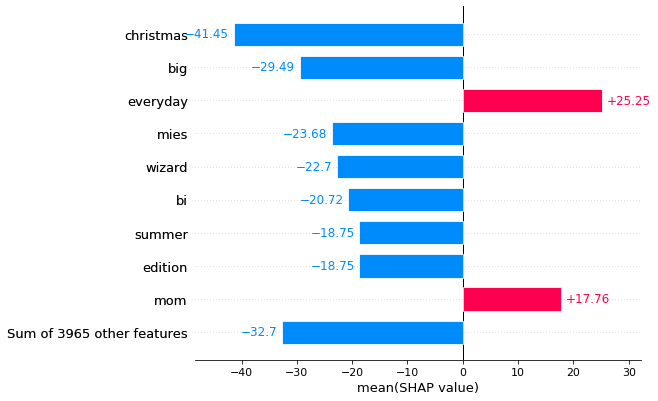

   ---- (BERT) (TEST) (all) min ----


   ---- (BERT) (TEST) (all) max ----


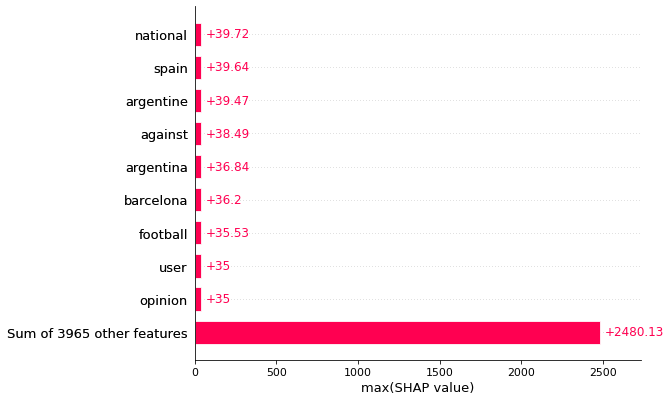

In [36]:
print('   ---- (BERT) (TEST) (all) mean ----')
shap.plots.bar(shap_valuesNC.mean(0))
print('   ---- (BERT) (TEST) (all) min ----')
shap.plots.bar(shap_valuesNC.min(0))
print('   ---- (BERT) (TEST) (all) max ----')
shap.plots.bar(shap_valuesNC.max(0), order=shap.Explanation.identity)

## -------------- ALL TOPICS - TEST

In [25]:
p = '/data/DEV_DATA/TWITTER API/other/data_complete_vaccine_chloro/data/data_objects/ANALYSIS/influencer_LABEL/5%/bert_text/shap_temp_TEST_ALL.pickle'
shap_valuesC, samp_X, samp_y, outputs, val, samp_X_list  = load_pickle(p)

In [28]:
outputs = np.stack(outputs)
preds = outputs.argmax(axis=-1)
lab = samp_y['label'].tolist()
print(classification_report(lab, preds))

bad_preds = []
good_preds = []
cpt=0
for p, l in zip(preds, lab):
    if(p!=l):
        bad_preds.append(cpt)
    else:
        good_preds.append(cpt)
    cpt+=1
print(len(bad_preds), 'vs', len(good_preds))

              precision    recall  f1-score   support

           0       0.97      0.30      0.46      3179
           1       0.63      0.99      0.77      3808

    accuracy                           0.68      6987
   macro avg       0.80      0.65      0.61      6987
weighted avg       0.78      0.68      0.63      6987

2258 vs 4729


   ---- (BERT) (TEST) (all) mean ----


   ---- (BERT) (TEST) (all) min ----


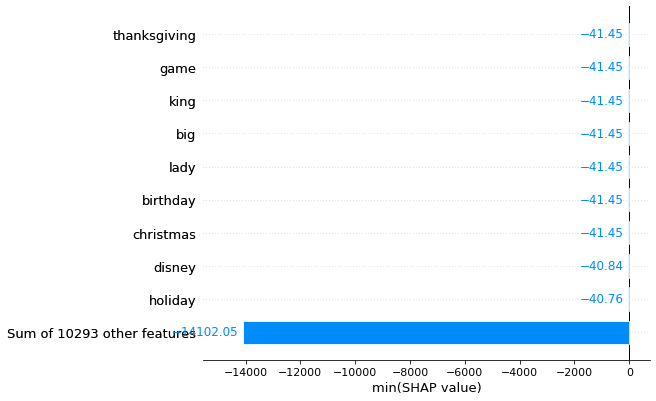

   ---- (BERT) (TEST) (all) max ----


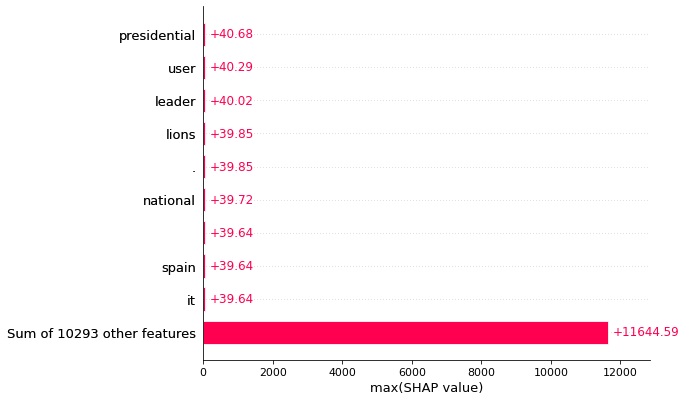

In [29]:
print('   ---- (BERT) (TEST) (all) mean ----')
shap.plots.bar(shap_valuesC.mean(0))
print('   ---- (BERT) (TEST) (all) min ----')
shap.plots.bar(shap_valuesC.min(0))
print('   ---- (BERT) (TEST) (all) max ----')
shap.plots.bar(shap_valuesC.max(0), order=shap.Explanation.identity)

# ============================== TRAIN SET ==============================

## ------------------ CONTROVERSY (bolsonero) ---------------

In [38]:
p = '/data/DEV_DATA/TWITTER API/other/data_complete_vaccine_chloro/data/data_objects/ANALYSIS/influencer_LABEL/5%/bert_text (overfit)/shap_temp_TRAIN_bolsonaro27.pickle'
shap_valuesC, samp_X, samp_y, outputs, val, samp_X_list = load_pickle(p)
THE_LABEL = 1

In [39]:
outputs = np.stack(outputs)
preds = outputs.argmax(axis=-1)
lab = [THE_LABEL] * len(preds)
print(classification_report(lab, preds))

bad_preds = []
good_preds = []
cpt=0
for p, l in zip(preds, lab):
    if(p!=l):
        bad_preds.append(cpt)
    else:
        good_preds.append(cpt)
    cpt+=1
print(len(bad_preds), 'vs', len(good_preds))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      1.00      1.00      1306

    accuracy                           1.00      1306
   macro avg       0.50      0.50      0.50      1306
weighted avg       1.00      1.00      1.00      1306

4 vs 1302


   ---- (BERT) (TEST) (all) mean ----


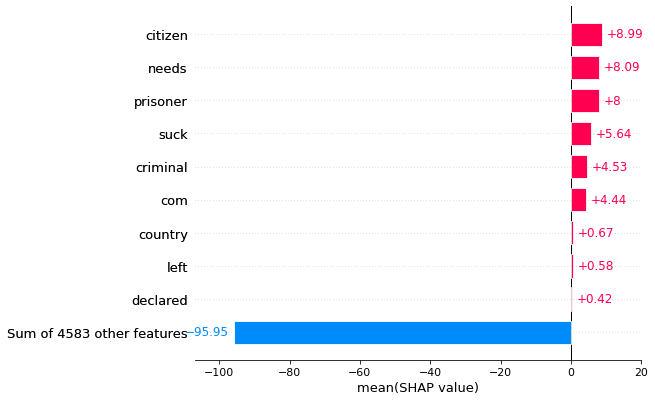

   ---- (BERT) (TEST) (all) min ----


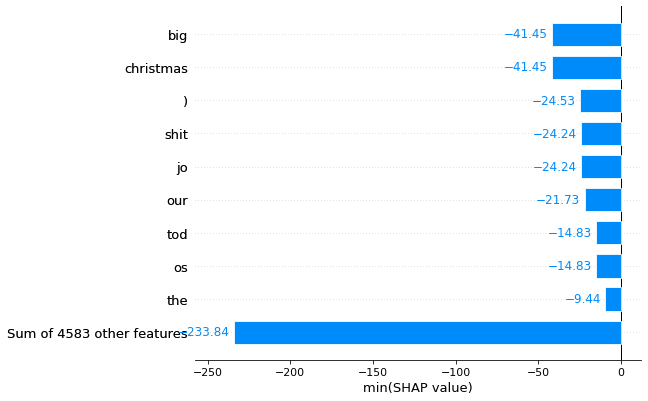

   ---- (BERT) (TEST) (all) max ----


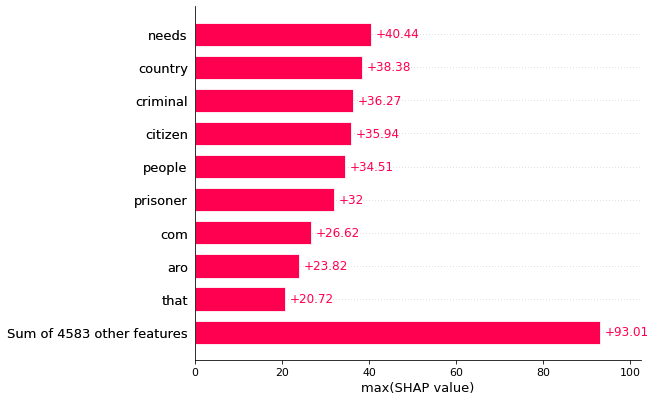

In [42]:
print('   ---- (BERT) (TRAIN) (all) mean ----')
shap.plots.bar(shap_valuesC.mean(0), order=shap.Explanation.identity)
print('   ---- (BERT) (TRAIN) (all) min ----')
shap.plots.bar(shap_valuesC.min(0))
print('   ---- (BERT) (TRAIN) (all) max ----')
shap.plots.bar(shap_valuesC.max(0), order=shap.Explanation.identity)

## ------------------ NON-CONTROVERSY (feliznatal) ---------------

In [46]:
p = '/data/DEV_DATA/TWITTER API/other/data_complete_vaccine_chloro/data/data_objects/ANALYSIS/influencer_LABEL/5%/bert_text (overfit)/shap_temp_TRAIN_feliznatal.pickle'
shap_valuesNC, samp_X, samp_y, outputs, val, samp_X_list = load_pickle(p)
THE_LABEL = 0

In [47]:
outputs = np.stack(outputs)
preds = outputs.argmax(axis=-1)
lab = [THE_LABEL] * len(preds)
print(classification_report(lab, preds))

bad_preds = []
good_preds = []
cpt=0
for p, l in zip(preds, lab):
    if(p!=l):
        bad_preds.append(cpt)
    else:
        good_preds.append(cpt)
    cpt+=1
print(len(bad_preds), 'vs', len(good_preds))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1567
           1       0.00      0.00      0.00         0

    accuracy                           0.99      1567
   macro avg       0.50      0.49      0.50      1567
weighted avg       1.00      0.99      0.99      1567

22 vs 1545


   ---- (BERT) (TEST) (all) mean ----


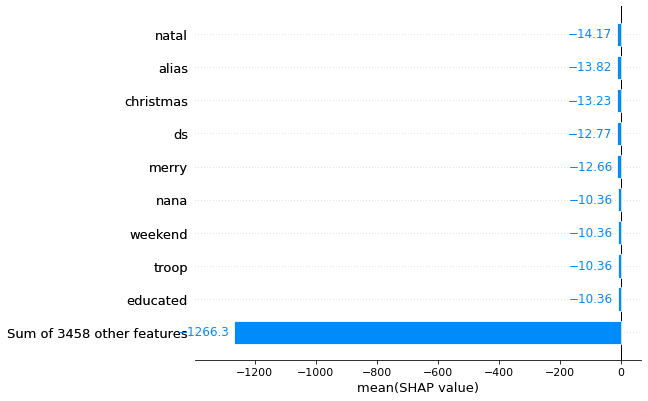

   ---- (BERT) (TEST) (all) min ----


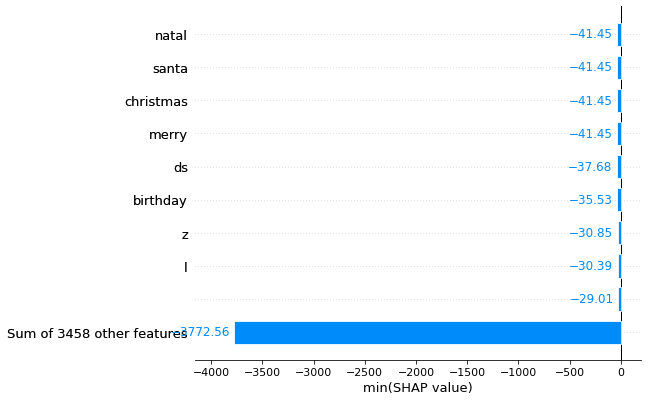

   ---- (BERT) (TEST) (all) max ----


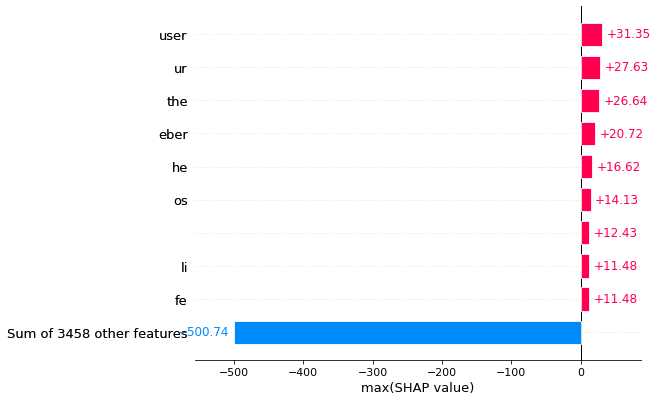

In [48]:
print('   ---- (BERT) (TRAIN) (all) mean ----')
shap.plots.bar(shap_valuesNC.mean(0))
print('   ---- (BERT) (TRAIN) (all) min ----')
shap.plots.bar(shap_valuesNC.min(0))
print('   ---- (BERT) (TRAIN) (all) max ----')
shap.plots.bar(shap_valuesNC.max(0), order=shap.Explanation.identity)

## -------------- ALL TOPICS - TRAIN

In [19]:
p = '/data/DEV_DATA/TWITTER API/other/data_complete_vaccine_chloro/data/data_objects/ANALYSIS/influencer_LABEL/5%/bert_text/shap_temp_TRAIN_ALL.pickle'
shap_valuesC, samp_X, samp_y, outputs, val, samp_X_list  = load_pickle(p)

In [20]:
outputs = np.stack(outputs)
preds = outputs.argmax(axis=-1)
lab = samp_y['controversy_LABEL'].tolist()
print(classification_report(lab, preds))

bad_preds = []
good_preds = []
cpt=0
for p, l in zip(preds, lab):
    if(p!=l):
        bad_preds.append(cpt)
    else:
        good_preds.append(cpt)
    cpt+=1
print(len(bad_preds), 'vs', len(good_preds))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98     17295
           1       0.98      1.00      0.99     19276

    accuracy                           0.99     36571
   macro avg       0.99      0.99      0.99     36571
weighted avg       0.99      0.99      0.99     36571

523 vs 36048


In [23]:
print('   ---- (BERT) (TRAIN) (all) mean ----')
shap.plots.bar(shap_valuesC.mean(0))
print('   ---- (BERT) (TRAIN) (all) min ----')
shap.plots.bar(shap_valuesC.min(0))
print('   ---- (BERT) (TRAIN) (all) max ----')
shap.plots.bar(shap_valuesC.max(0), order=shap.Explanation.identity)

   ---- (BERT) (TRAIN) (all) mean ----


   ---- (BERT) (TRAIN) (all) min ----


   ---- (BERT) (TRAIN) (all) max ----


# ===============================================================================================================

# ============= RF x LIWC ============== 

## -------------- ALL TOPICS - TEST

In [30]:
p = '/data/DEV_DATA/TWITTER API/other/data_complete_vaccine_chloro/data/data_objects/ANALYSIS/influencer_LABEL/5%/random_forest_liwc/shap_temp_TEST_ALL.pickle'
explainer, shap_obj, shap_values, sample_X, sample_y  = load_pickle(p)

   ---- (BERT) (TEST) (RF x LIWC) mean ----


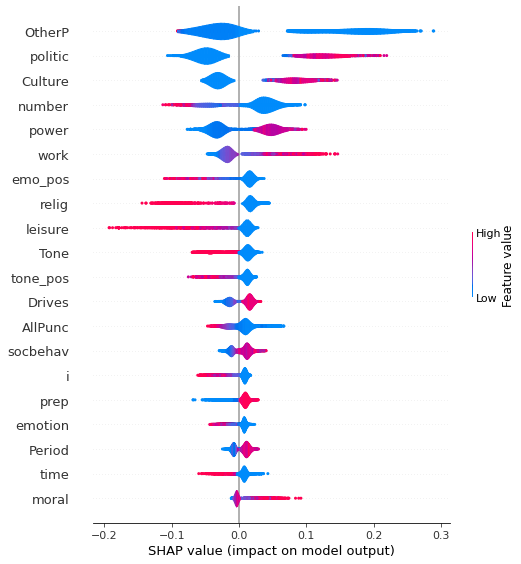

In [31]:
print('   ---- (BERT) (TEST) (RF x LIWC) mean ----') #most common & most impact
shap.summary_plot(shap_values[1], sample_X, plot_type='violin', title="test_set")

## -------------- ALL TOPICS - TRAIN

In [7]:
p = '/data/DEV_DATA/TWITTER API/other/data_complete_vaccine_chloro/data/data_objects/ANALYSIS/influencer_LABEL/5%/random_forest_liwc/shap_temp_TRAIN_ALL.pickle'
explainer, shap_obj, shap_values, sample_X, sample_y  = load_pickle5(p)

   ---- (BERT) (TRAIN) (RF x LIWC) mean ----


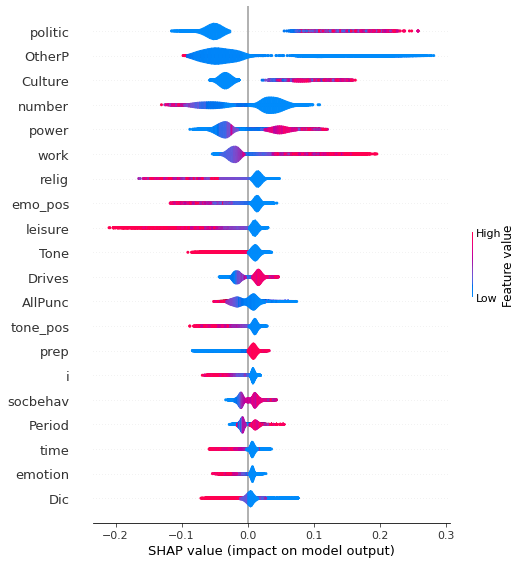

In [8]:
print('   ---- (BERT) (TRAIN) (RF x LIWC) mean ----') #most common & most impact
shap.summary_plot(shap_values[1], sample_X, plot_type='violin', title="train_set")

In [ ]:
# s = shap_values[0] 
# s = s[:,110:117]
# punctuation = ['AllPunc', 'Period', 'Comma', 'QMark', 'Exclam', 'Apostro', 'OtherP']
# shap.summary_plot(s, sample_X[punctuation], plot_type='violin', title="test_set")